# Decode cypher text

### Welcome!
This notebook can decode cypher text. It uses a DFA created by the method outlined here
[Extracting Automata from Recurrent Neural Networks Using Queries and Counterexamples](https://arxiv.org/abs/1711.09576).

In this notebook will automatically train an RNN on symplfied set of english, and extract a DFA from that RNN.


# Code below

In [1]:
from LSTM import LSTMNetwork
from GRU import GRUNetwork
from RNNClassifier import RNNClassifier
from Training_Functions import make_train_set_for_target,mixed_curriculum_train
from Extraction import extract
import time
from memory_profiler import profile
import FalseWordGenerator as FWG

import ALPHABET_8
ALPHABET = ALPHABET_8.ALPHABET
print (ALPHABET)

['a', 'e', 'i', 'n', 'o', 'r', 's', 't']


In [2]:
MEANINGFUL_WORDS = ALPHABET_8.WORDS
MEANINGLESS_WORDS = FWG.generateFalseWords(ALPHABET, MEANINGFUL_WORDS)
def target(w):             
   if w.lower() in MEANINGFUL_WORDS:
      return True
   else:
      return False
    
train_set = {}
train_set.update({w: True for w in MEANINGFUL_WORDS})
train_set.update({w: False for w in MEANINGLESS_WORDS})
print ("made training set of size: " + str(len(train_set)))
print ("of which " + str(len(MEANINGFUL_WORDS)) + str(" are positive"))
print ("of which " + str(len(MEANINGLESS_WORDS)) + str(" are negative"))

made training set of size: 2044
of which 1031 are positive
of which 1018 are negative


# Train and Extract with the optimal network

In [3]:
rnnOpt = RNNClassifier(ALPHABET,num_layers=3,hidden_dim=50,RNNClass = LSTMNetwork)

The dy.parameter(...) call is now DEPRECATED.
        There is no longer need to explicitly add parameters to the computation graph.
        Any used parameter will be added automatically.


current average loss is:  0.307683126642866
current average loss is:  0.15569727166908462
current average loss is:  0.04723374842727124


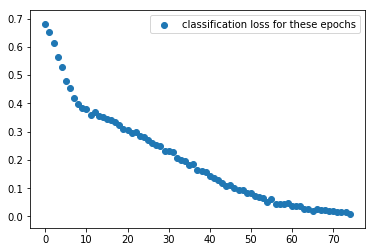

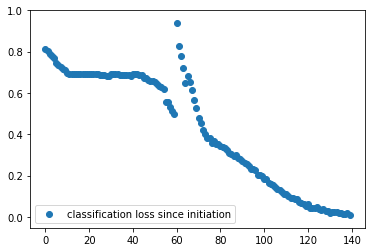

classification loss on last batch was: 0.0086253933696126


In [4]:
mixed_curriculum_train(rnnOpt,train_set,stop_threshold = 0.01)

In [5]:
all_words = sorted(list(train_set.keys()),key=lambda x:len(x))
pos = next((w for w in all_words if rnnOpt.classify_word(w)==True),None)
neg = next((w for w in all_words if rnnOpt.classify_word(w)==False),None)
starting_examples = [w for w in [pos,neg] if not None == w]

In [6]:
rnnOpt.renew()

provided counterexamples are: ['an', 'se']
obs table refinement took 0.0
guided starting equivalence query for DFA of size 2


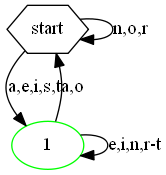

storing provided counterexample of length 2
returning counterexample of length 2:		se, this counterexample is rejected by the given RNN.
equivalence checking took: 0.03886031700000103
obs table refinement took 0.042
guided starting equivalence query for DFA of size 4


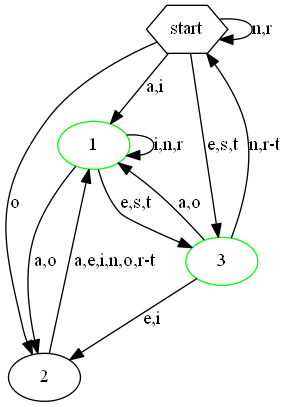

['', 'a']
refining, H size is 1
split wasn't perfect: gotta start over
['', 'n']
['a', 'o']
refining, H size is 1
['', 'n', 'r']
['an', 'ar']
returning counterexample of length 2:		ea, this counterexample is rejected by the given RNN.
equivalence checking took: 0.6792671060000117
obs table refinement took 0.055
guided starting equivalence query for DFA of size 8


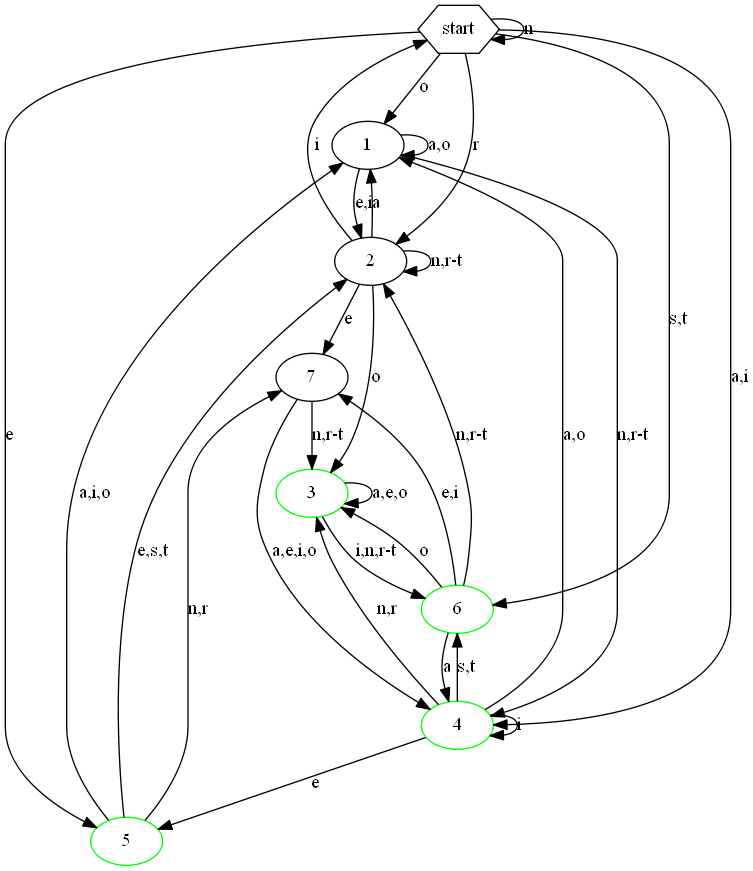

['', 'n']
['', 'n', 'r']
refining, H size is 2
['an', 'ar']
['ee', 'ei']
returning counterexample of length 3:		eeo, this counterexample is rejected by the given RNN.
equivalence checking took: 0.10946866099999397
obs table refinement took 0.371
guided starting equivalence query for DFA of size 27


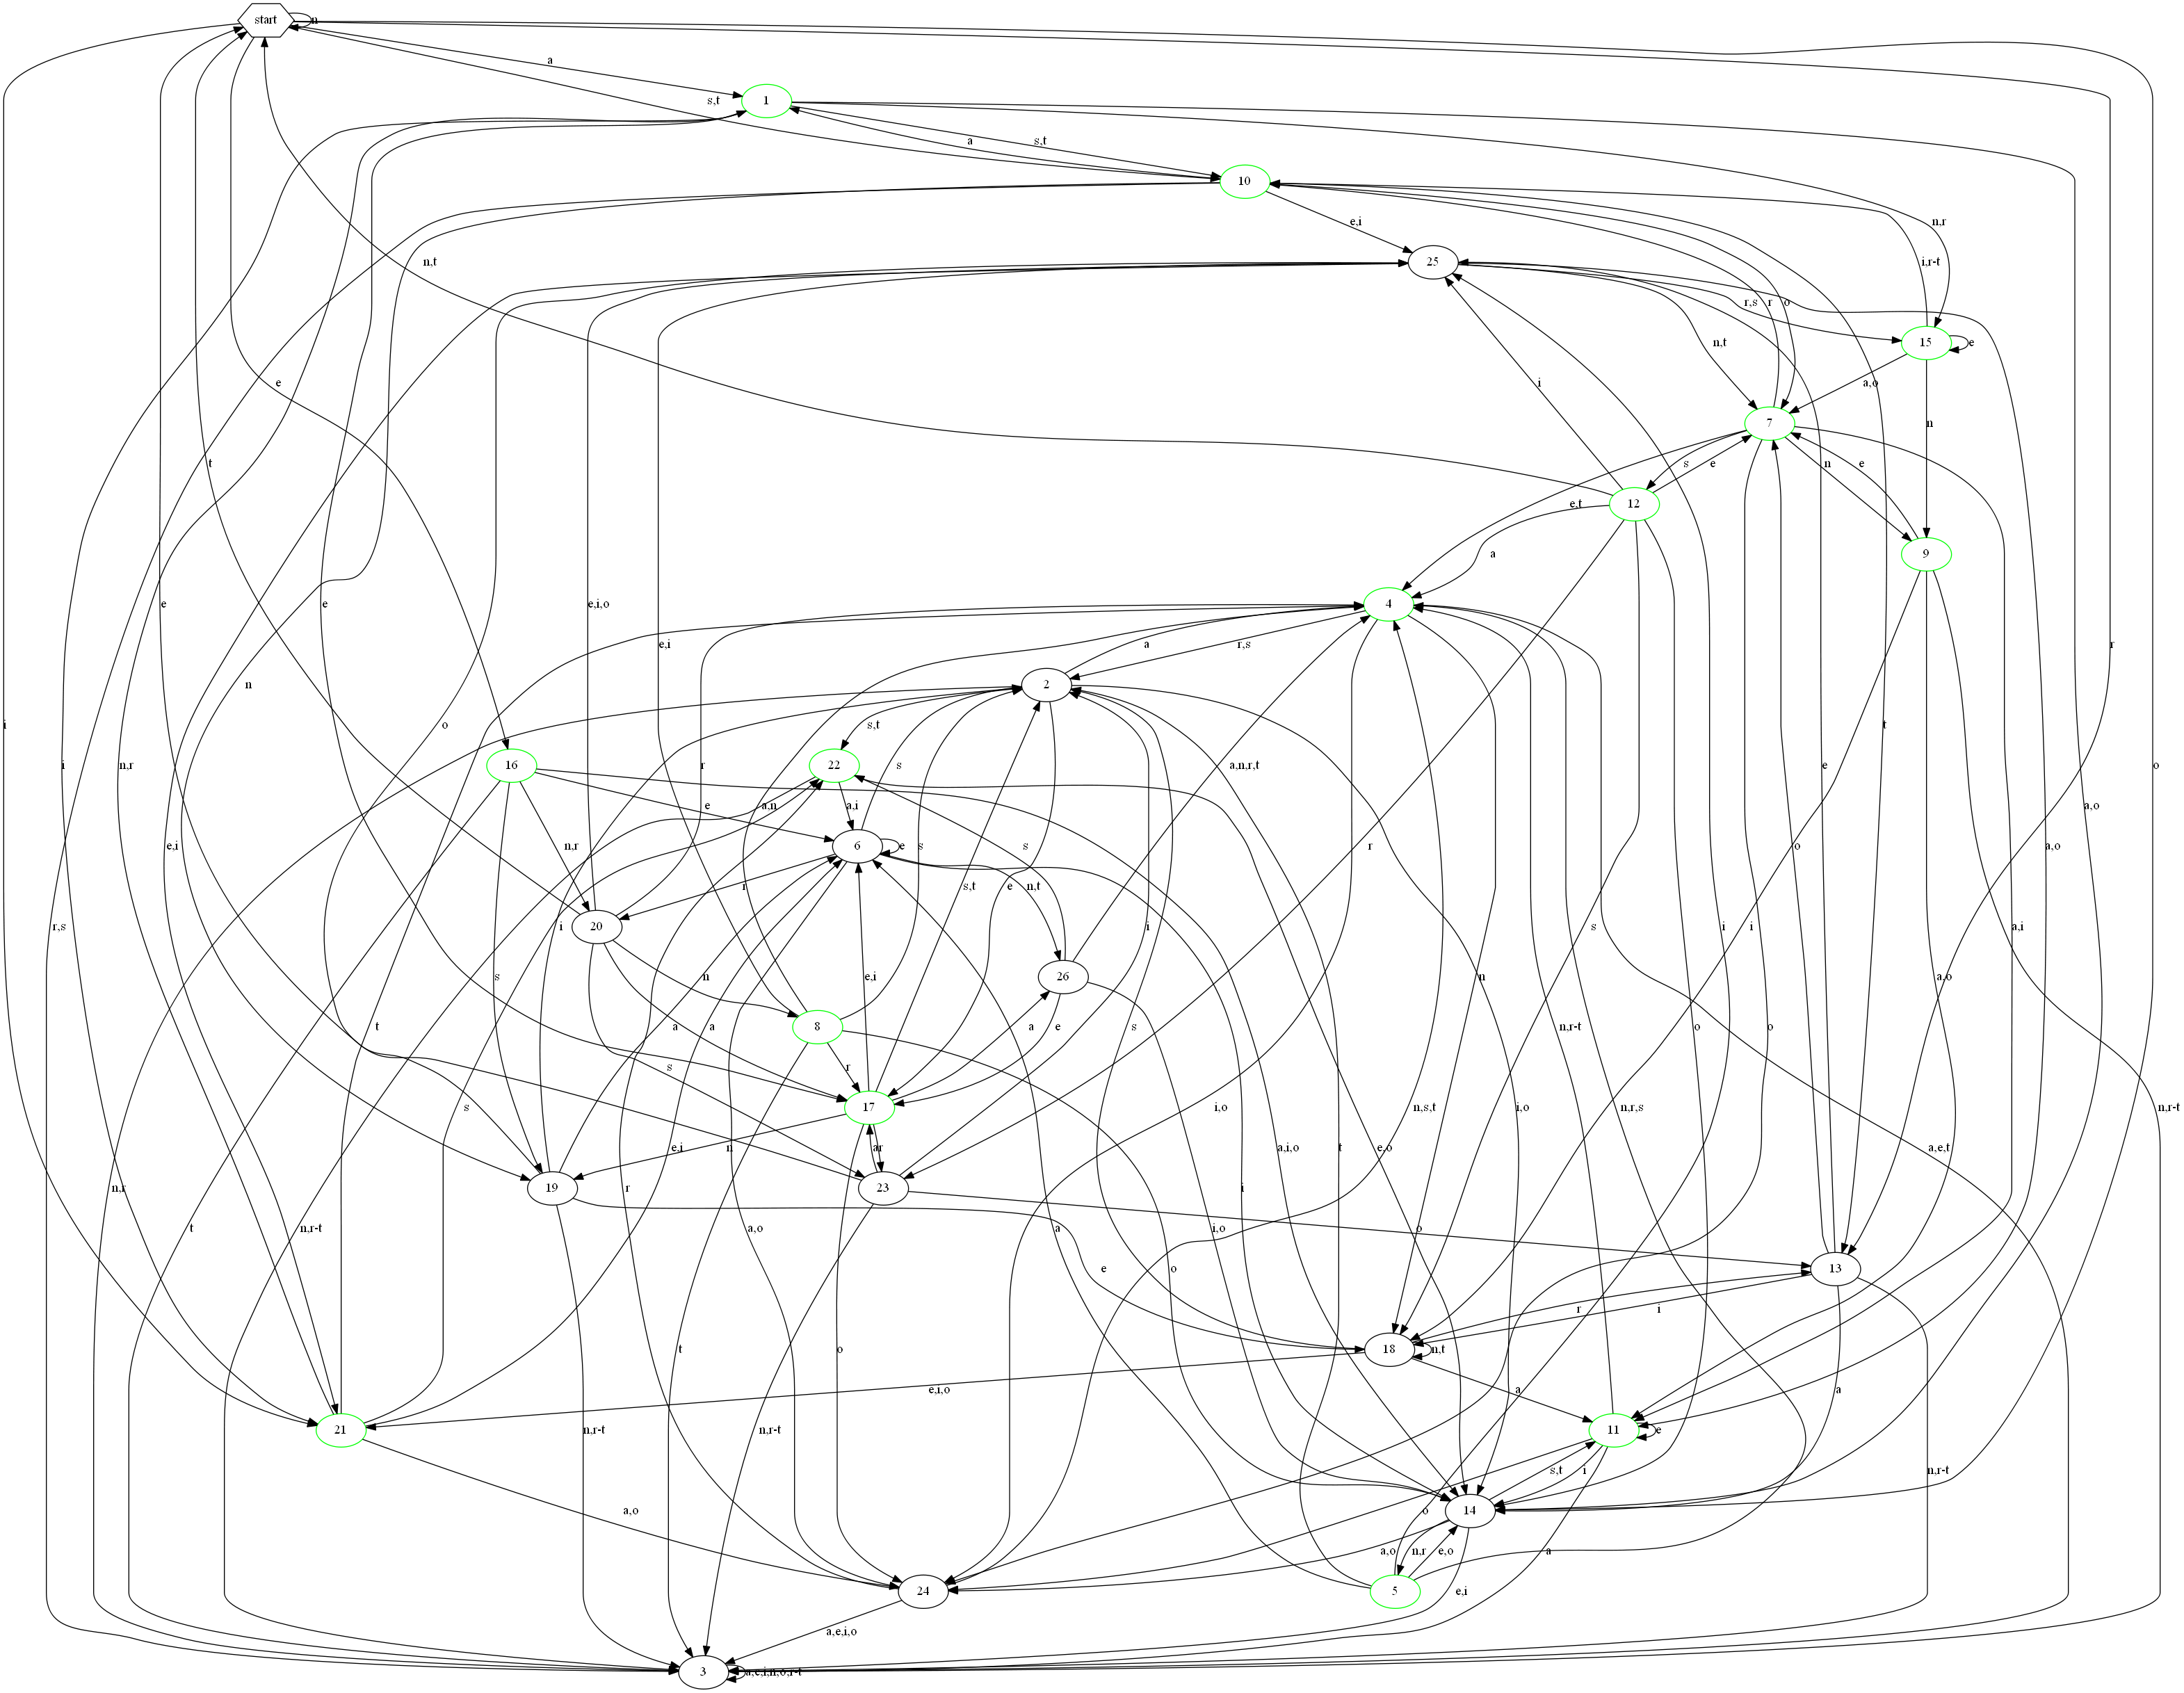

['', 'n']
['an', 'ar']
['ee', 'ei']
refining, H size is 1
['en', 'er']
['ei', 'es']
returning counterexample of length 3:		eit, this counterexample is rejected by the given RNN.
equivalence checking took: 0.9876887739999916
obs table refinement took 1.75
guided starting equivalence query for DFA of size 80
['', 'n']
['an', 'ar']
['en', 'er']
['ei', 'es']
refining, H size is 1
['es', 'et']
returning counterexample of length 4:		esen, this counterexample is accepted by the given RNN.
equivalence checking took: 0.024699864999973897
obs table refinement took 9.253
guided starting equivalence query for DFA of size 197
['', 'n']
refining, H size is 1
['an', 'ar']
['en', 'er']
['es', 'et']
returning counterexample of length 4:		esnt, this counterexample is rejected by the given RNN.
equivalence checking took: 0.024635736999982782
obs table timed out
observation table timed out during refinement
overall guided extraction time took: 60.152844225999985
generated counterexamples were: (format: (c

In [7]:
dfaOpt = extract(rnnOpt,time_limit = 60, initial_split_depth = 10, starting_examples = starting_examples)

# Cypher some messages

In [8]:
import cypher_creation as cypher
#a,e,i,n,o,r,s,t
messageOne = 'tea is rotten'
messageTwo = 'no rest eat'
messageThree = 'stone it not'

cypher1 = cypher.rotate_sentence(messageOne, ALPHABET)
cypher2 = cypher.rotate_sentence(messageTwo, ALPHABET)
cypher3 = cypher.rotate_sentence(messageThree, ALPHABET)

print(cypher1)
print(cypher2)
print(cypher3)

tea is rotten
no rest eat
stone it not
['a', 'i', 'e', 'n', 't', 's', 'r', 'a', 'a', 'i', 'o']
['o', 'r', 's', 'i', 't', 'a', 'i', 'e', 'a']
['t', 'a', 'r', 'o', 'i', 'n', 'a', 'o', 'r', 'a']


In [9]:
import Rotation_Checker as RCT
RCT.rtCyChecker(cypher1, ALPHABET, rnnOpt, dfaOpt)        # Call above functions

NameError: name 'cypherOne' is not defined

#### 3.4. Get stats
Display the extracted DFA by using the `draw_nicely` function, which has optional parameters `maximum` (default $60$) and `force` (default `False`), and will only draw the DFA if it has less than `maximum` states or `force` is set to `True`.

Print some statistics you might find interesting about the network, such as the trained RNN's accuracy against its target, the extracted DFA's accuracy against the RNN, and the extracted DFA's accuracy against the original RNN's target.

In [ ]:

from math import pow
def percent(num,digits=2):
    tens = pow(10,digits)
    return str(int(100*num*tens)/tens)+"%"

dfaOpt.draw_nicely(maximum=300) #max size willing to draw

test_set = train_set 
print("testing on train set, i.e. test set is train set")
# we're printing stats on the train set for now, but you can define other test sets by using
# make_train_set_for_target

n = len(test_set)
print("test set size:", n)
pos = len([w for w in test_set if target(w)])
print("of which positive:",pos,"("+percent(pos/n)+")")
rnn_target = len([w for w in test_set if rnn.classify_word(w)==target(w)])
print("rnn score against target on test set:",rnn_target,"("+percent(rnn_target/n)+")")
dfa_rnn = len([w for w in test_set if rnn.classify_word(w)==dfa.classify_word(w)])
print("extracted dfa score against rnn on test set:",dfa_rnn,"("+percent(dfa_rnn/n)+")")
dfa_target = len([w for w in test_set if dfa.classify_word(w)==target(w)])
print("extracted dfa score against target on rnn's test set:",dfa_target,"("+percent(dfa_target/n)+")")


Rotation Cypher Checker